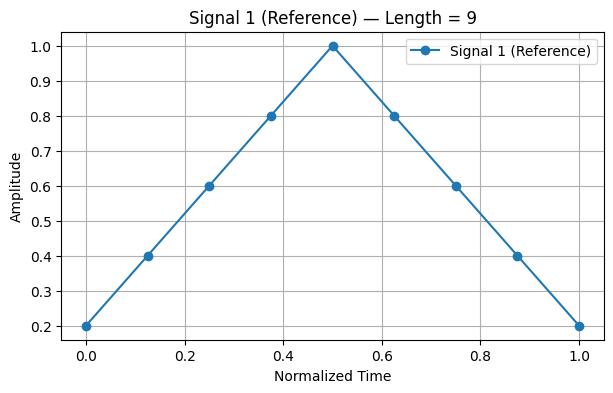

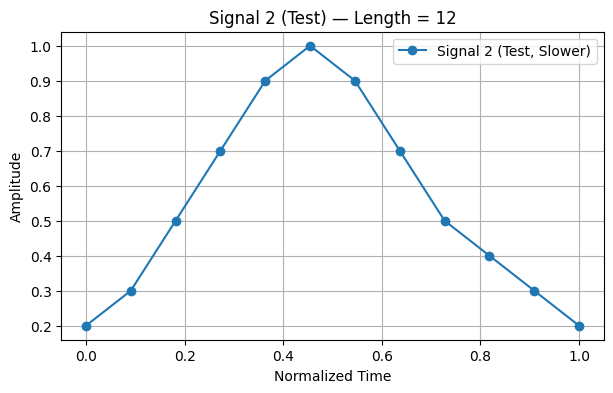

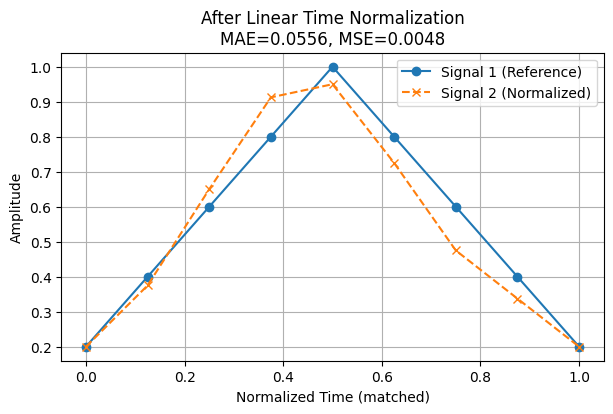

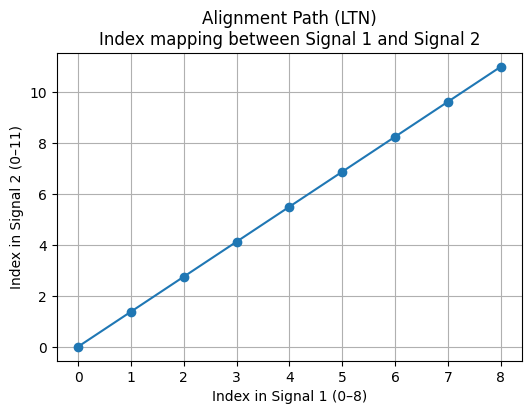

Normalized Signal 2 values:
 [0.2    0.375  0.65   0.9125 0.95   0.725  0.475  0.3375 0.2   ]

Mean Absolute Error (MAE): 0.055556
Mean Squared Error (MSE): 0.004826

Inference:
Linear Time Normalization adjusts the time axis of the slower signal so both signals
have equal lengths, enabling direct comparison and alignment. It ensures that similar
parts of the waveform (rising, peak, and falling patterns) align in time, even when
spoken at different speeds.



In [1]:
# ==============================

# Lab Exercise V – Time Alignment and Normalization

# Aim:

# To align two speech sequences of the same word spoken at different speeds

# using Linear Time Normalization (LTN) and analyze how time alignment

# helps in matching temporal patterns.

# ==============================

import numpy as np
import matplotlib.pyplot as plt

# --- Given speech-like signals ---

signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])  # Reference signal
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])  # Test (slower/longer)

n1 = len(signal1)
n2 = len(signal2)

# --- Define normalized time axes (0–1 range for each) ---

t1 = np.linspace(0.0, 1.0, n1)
t2 = np.linspace(0.0, 1.0, n2)

# --- Plot original signals ---

plt.figure(figsize=(7,4))
plt.plot(t1, signal1, marker='o', label="Signal 1 (Reference)")
plt.title("Signal 1 (Reference) — Length = {}".format(n1))
plt.xlabel("Normalized Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(t2, signal2, marker='o', label="Signal 2 (Test, Slower)")
plt.title("Signal 2 (Test) — Length = {}".format(n2))
plt.xlabel("Normalized Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# --- Linear Time Normalization ---

# Resample/interpolate Signal 2 to have the same number of samples as Signal 1

signal2_norm = np.interp(t1, t2, signal2)

# --- Compute simple matching metrics after normalization ---

mae_after = np.mean(np.abs(signal1 - signal2_norm))
mse_after = np.mean((signal1 - signal2_norm)**2)

# --- Plot overlay of both signals after normalization ---

plt.figure(figsize=(7,4))
plt.plot(t1, signal1, 'o-', label="Signal 1 (Reference)")
plt.plot(t1, signal2_norm, 'x--', label="Signal 2 (Normalized)")
plt.title(f"After Linear Time Normalization\nMAE={mae_after:.4f}, MSE={mse_after:.4f}")
plt.xlabel("Normalized Time (matched)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# --- Alignment Path ---

# i → j mapping: j = i * (n2-1)/(n1-1)

i_idx = np.arange(n1)
j_idx_float = i_idx * (n2 - 1) / (n1 - 1)

plt.figure(figsize=(6,4))
plt.plot(i_idx, j_idx_float, marker='o')
plt.title("Alignment Path (LTN)\nIndex mapping between Signal 1 and Signal 2")
plt.xlabel("Index in Signal 1 (0–{})".format(n1-1))
plt.ylabel("Index in Signal 2 (0–{})".format(n2-1))
plt.grid(True)
plt.show()

# --- Print numerical summary ---

print("Normalized Signal 2 values:\n", np.round(signal2_norm, 4))
print(f"\nMean Absolute Error (MAE): {mae_after:.6f}")
print(f"Mean Squared Error (MSE): {mse_after:.6f}")

# --- Inference ---

print("""
Inference:
Linear Time Normalization adjusts the time axis of the slower signal so both signals
have equal lengths, enabling direct comparison and alignment. It ensures that similar
parts of the waveform (rising, peak, and falling patterns) align in time, even when
spoken at different speeds.
""")
